In [15]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as mtick
import numpy as np

from plot_helpers import _load_results_helper, sup_label

# customizations
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

plt.style.use('tableau-colorblind10')

nucs = ['Am242_m1', 'Cm242', 'Cm245', 'Cm246', 'Cs133', 'Cs134', 'Mo97']

In [16]:
_, openmc_nucs, time = _load_results_helper('openmc')
_, serpent_nucs, _ = _load_results_helper('serpent')

nuclide_dict = {}
openmc_nuclides = openmc_nucs.keys()
serpent_nuclides = openmc_nucs.keys()
nuclides = set(openmc_nuclides).intersection(set(serpent_nuclides))

/tmp/ipykernel_74829/1994234702.py:11: RuntimeWarning: invalid value encountered in divide
  err = (openmc_nucs[nuc] - serpent_nucs[nuc]) / serpent_nucs[nuc]


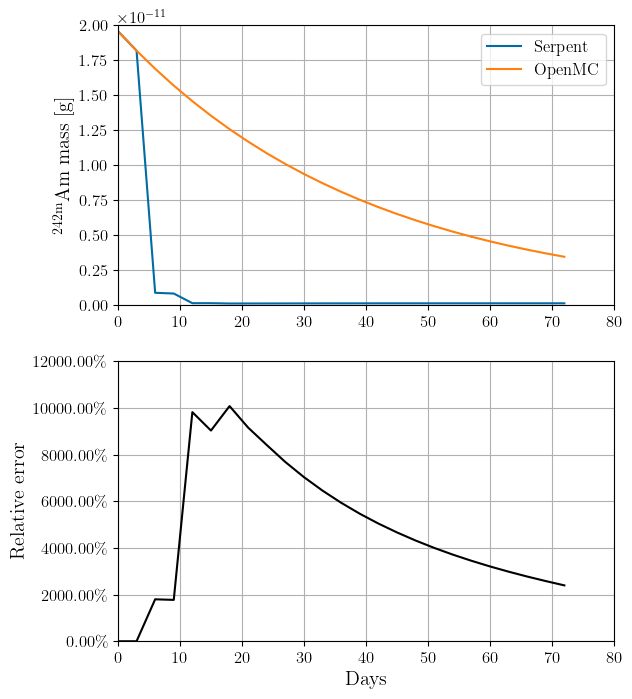

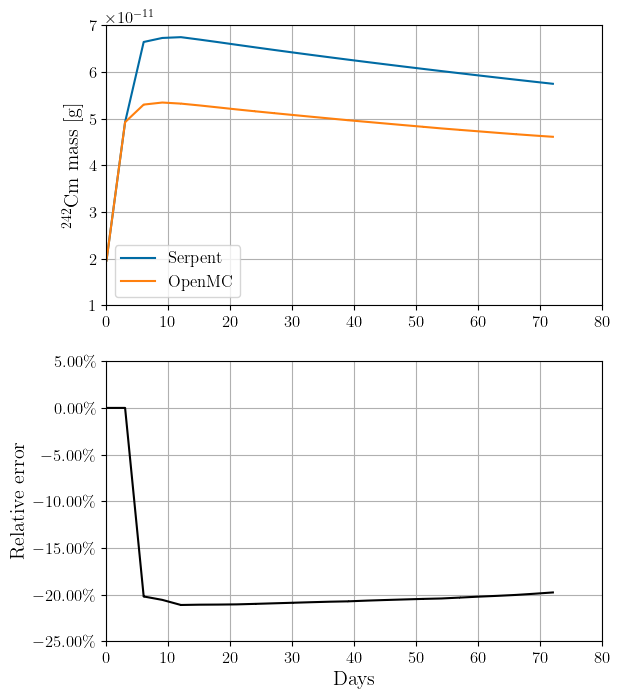

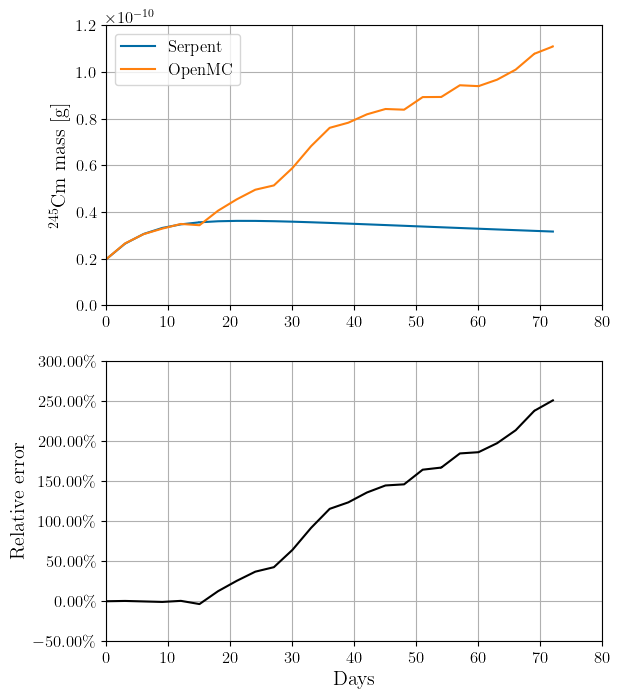

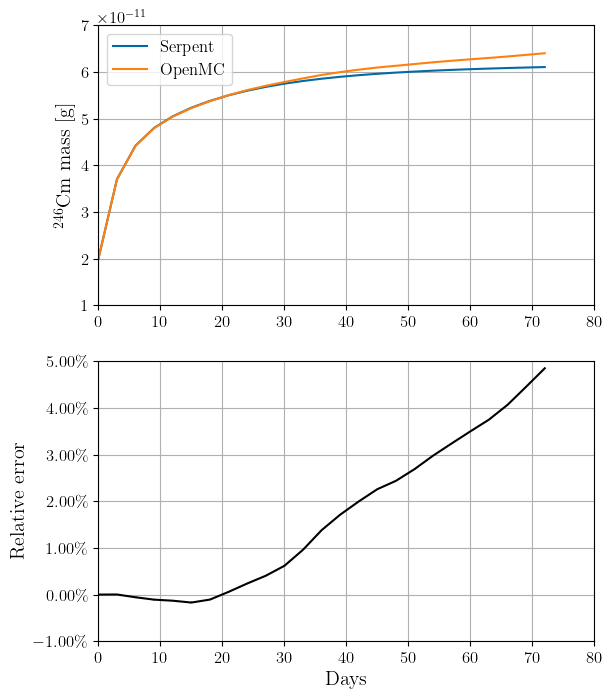

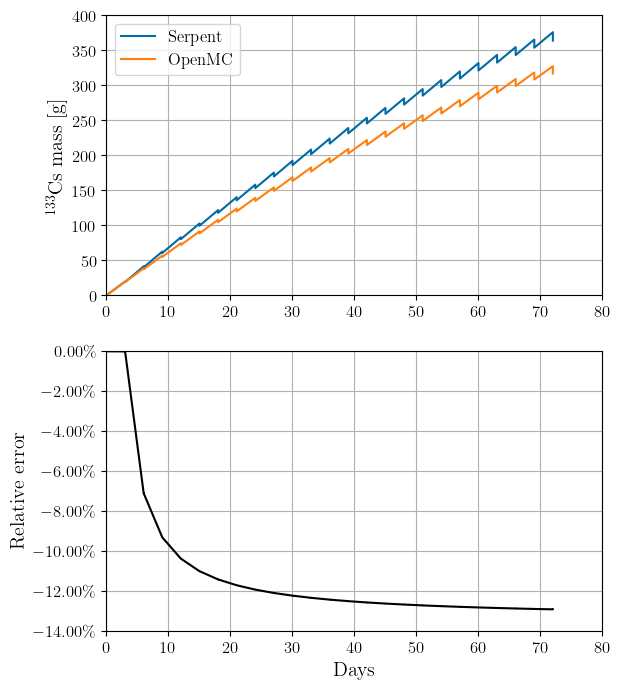

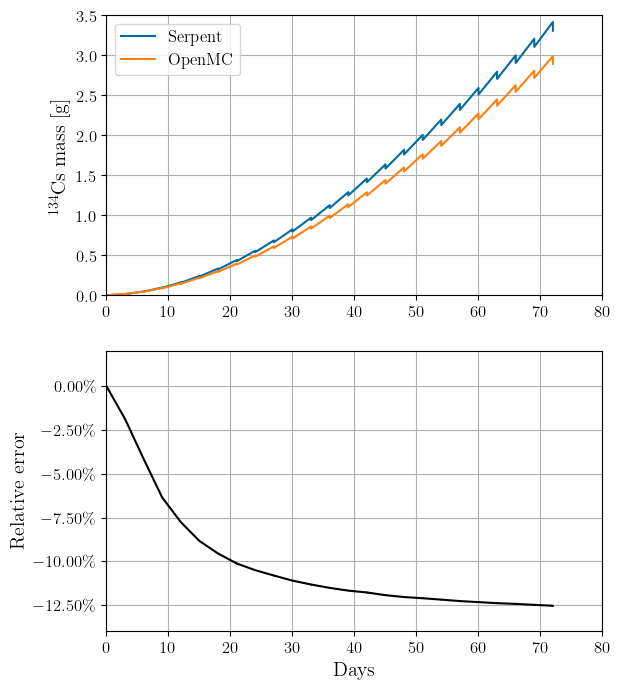

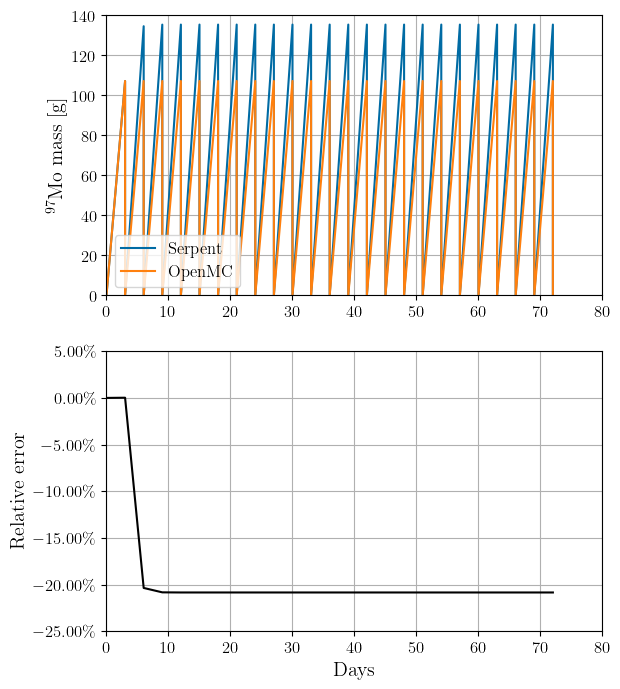

In [26]:
i=0
j = 49
for nuc in nucs:
    nucname = sup_label(nuc)
    fig, ax = plt.subplots(nrows=2, figsize = (6.4, 8.0))
    ax[0].plot(time[i:j], serpent_nucs[nuc][i:j], label='Serpent')
    ax[0].plot(time[i:j], openmc_nucs[nuc][i:j], label='OpenMC')
    ax[0].legend()

    #fig[, ax2 = plt.subplots()
    err = (openmc_nucs[nuc] - serpent_nucs[nuc]) / serpent_nucs[nuc]
    for k in range(len(err)):
        if np.isnan(err[k]):
            err[k] = err[k-1]
    ax[1].plot(time[i:j], err[i:j], color='black')
    ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 2))
    
    ax[0].grid()
    ax[1].grid()
    ax[0].set_ylabel(f'{nucname} mass [g]')
    ax[1].set_ylabel(f'Relative error')
    #ax[.set_xlabel('Days')
    ax[1].set_xlabel('Days')
    
    fig.savefig(f'../figs/ch5/{nuc}_mass.pdf')